In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt


In [19]:
import datetime
import dateutil

In [2]:
df = pd.read_csv('/Users/nishant.deshpande/personal/coronavirus-excess-mortality-data/data/ft_excess_deaths.csv')

In [15]:
df.head(5)

,country,region,period,year,month,week,date,deaths,expected_deaths,excess_deaths,excess_deaths_pct
0,Italy,Bergamo city,week,2015,1,2.0,2015-01-15,39.0,36.0,3.0,8.333333
1,Italy,Bergamo city,week,2015,1,3.0,2015-01-22,31.0,31.0,0.0,0.000000
2,Italy,Bergamo city,week,2015,1,4.0,2015-01-29,41.0,39.0,2.0,5.128205
3,Italy,Bergamo city,week,2015,2,5.0,2015-02-05,31.0,31.0,0.0,0.000000
4,Italy,Bergamo city,week,2015,2,6.0,2015-02-12,38.0,35.0,3.0,8.571429


In [18]:
df.date

0        2015-01-15
1        2015-01-22
2        2015-01-29
3        2015-02-05
4        2015-02-12
            ...    
55726    2020-05-31
55727    2020-06-07
55728    2020-06-14
55729    2020-06-21
55730    2020-06-28
Name: date, Length: 55731, dtype: object

In [28]:
df.describe()

,year,month,week,deaths,expected_deaths,excess_deaths,excess_deaths_pct
count,55731.000000,55731.000000,55361.000000,55724.000000,55731.000000,55724.000000,55724.000000
mean,2016.306185,6.095441,24.391413,1586.630669,1604.233613,-17.169157,0.459113
std,2.686861,3.396728,14.769845,4911.046039,4957.316067,444.681359,26.626701
min,2010.000000,1.000000,1.000000,1.000000,1.000000,-6065.000000,-95.145631
25%,2014.000000,3.000000,12.000000,119.000000,118.000000,-27.000000,-6.448572
50%,2017.000000,6.000000,23.000000,605.500000,611.000000,0.000000,0.000000
75%,2018.000000,9.000000,37.000000,1204.000000,1217.000000,9.000000,2.922899
max,2020.000000,12.000000,52.000000,78296.000000,60980.000000,23435.000000,1400.000000


In [26]:
df.columns

Index(['country', 'region', 'period', 'year', 'month', 'week', 'date',
       'deaths', 'expected_deaths', 'excess_deaths', 'excess_deaths_pct',
       'dt'],
      dtype='object')

In [82]:
df.country.unique()

array(['Italy', 'Netherlands', 'Ecuador', 'Spain', 'France', 'Turkey',
       'Indonesia', 'Russia', 'Brazil', 'Peru', 'Chile', 'Mexico', 'US',
       'UK', 'Belgium', 'Portugal', 'Denmark', 'Austria', 'Germany',
       'Sweden', 'South Africa', 'Norway', 'Israel', 'Iceland',
       'Switzerland'], dtype=object)

In [27]:
df.dt

0       2015-01-15
1       2015-01-22
2       2015-01-29
3       2015-02-05
4       2015-02-12
           ...    
55726   2020-05-31
55727   2020-06-07
55728   2020-06-14
55729   2020-06-21
55730   2020-06-28
Name: dt, Length: 55731, dtype: datetime64[ns]

In [38]:
df_g1 = df.groupby(['country', 'dt'])['deaths', 'expected_deaths', 'excess_deaths'].sum()

/Users/nishant.deshpande/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [47]:
df_g1 = df_g1.reset_index()

In [48]:
df_g1.index

RangeIndex(start=0, stop=7402, step=1)

In [49]:
df_g1.columns

Index(['country', 'dt', 'deaths', 'expected_deaths', 'excess_deaths'], dtype='object')

In [52]:
pd.set_option("display.max_rows", 200)

In [54]:
d1 = df_g1[df_g1.country == 'US'].sort_values('dt', ascending=False)

In [55]:
d1.set_index('dt', inplace=True)

In [78]:
d1.shape

(381, 4)

In [76]:
d1[1:20]

,country,deaths,expected_deaths,excess_deaths
dt,,,,
2020-06-13,US,83200.0,80850.5,2349.5
2020-06-06,US,99833.0,93070.5,6762.5
2020-05-30,US,106280.0,95972.0,10308.0
2020-05-23,US,111303.0,95794.0,15509.0
2020-05-16,US,118148.0,96596.0,21552.0
2020-05-09,US,123517.0,98520.0,24997.0
2020-05-02,US,129199.0,99567.0,29632.0
2020-04-25,US,140352.0,102060.5,38291.5
2020-04-18,US,146762.0,102546.0,44216.0


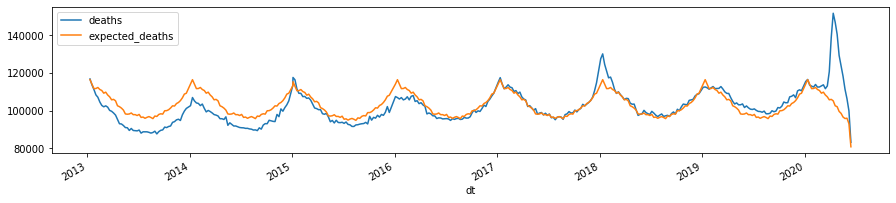

In [77]:
d1[1:][['deaths', 'expected_deaths']].plot(figsize=(15,3)).legend(loc='upper left')

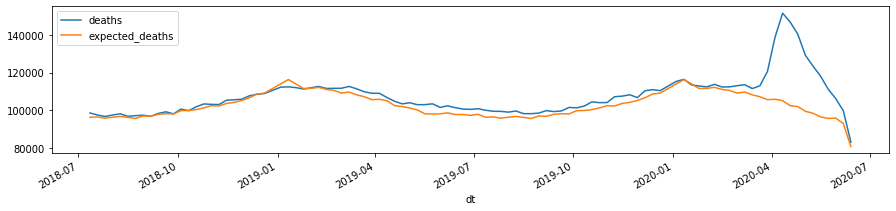

In [80]:
d1[1:100][['deaths','expected_deaths']].plot(figsize=(15,3)).legend(loc='upper left')

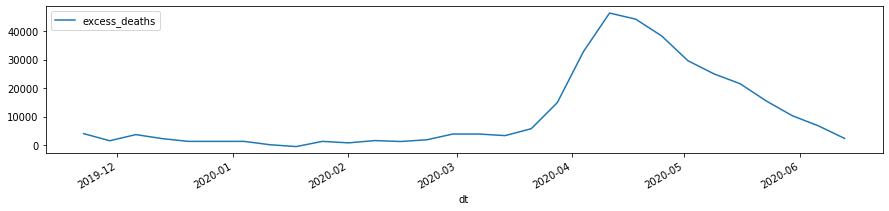

In [73]:
d1[1:30].excess_deaths.plot(figsize=(15,3)).legend(loc='upper left')

In [66]:
d1.sort_index(ascending=False)

,country,deaths,expected_deaths,excess_deaths
dt,,,,
2020-06-20,US,12790.0,12280.0,510.0
2020-06-13,US,83200.0,80850.5,2349.5
2020-06-06,US,99833.0,93070.5,6762.5
2020-05-30,US,106280.0,95972.0,10308.0
2020-05-23,US,111303.0,95794.0,15509.0
...,...,...,...,...
2013-02-08,US,107061.0,112228.0,-5167.0
2013-02-01,US,108325.0,111681.5,-3356.5
2013-01-25,US,111158.0,111620.0,-462.0


In [67]:
d1.shape

(381, 4)

In [69]:
d1[1:]

,country,deaths,expected_deaths,excess_deaths
dt,,,,
2020-06-13,US,83200.0,80850.5,2349.5
2020-06-06,US,99833.0,93070.5,6762.5
2020-05-30,US,106280.0,95972.0,10308.0
2020-05-23,US,111303.0,95794.0,15509.0
2020-05-16,US,118148.0,96596.0,21552.0
...,...,...,...,...
2013-02-08,US,107061.0,112228.0,-5167.0
2013-02-01,US,108325.0,111681.5,-3356.5
2013-01-25,US,111158.0,111620.0,-462.0


In [24]:
df_us = df[df.country == 'US']

In [25]:
df_us.describe()

,year,month,week,deaths,expected_deaths,excess_deaths,excess_deaths_pct
count,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000
mean,2016.260977,6.195279,25.214427,2128.686750,2152.491059,-23.804308,-1.015763
std,2.162893,3.362800,14.696907,7527.016671,7603.944733,520.025421,11.885525
min,2013.000000,1.000000,1.000000,57.000000,71.000000,-6065.000000,-51.187335
25%,2014.000000,3.000000,12.000000,319.000000,329.000000,-37.000000,-5.653556
50%,2016.000000,6.000000,24.000000,859.500000,884.000000,-2.000000,-0.400200
75%,2018.000000,9.000000,38.000000,1315.000000,1321.000000,11.000000,1.978068
max,2020.000000,12.000000,51.000000,78296.000000,60980.000000,23435.000000,644.702602


In [29]:
df_us_year_summary = df_us.groupby(['country', 'dt'])['deaths', 'expected_deaths', 'excess_deaths'].sum()

/Users/nishant.deshpande/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [9]:
df_us_year_summary

deaths  expected_deaths  excess_deaths
country year                                           
US      2013  4761416.0        5136611.0      -375195.0
        2014  4903023.0        5250697.5      -347674.5
        2015  5047318.0        5198963.0      -151645.0
        2016  5135894.0        5250697.5      -114803.5
        2017  5280992.0        5250697.5        30294.5
        2018  5345558.0        5250697.5        94860.5
        2019  5369430.0        5250697.5       118732.5
        2020  2843122.0        2530311.0       312811.0

In [11]:
df_us[df_us.year == 2020].month.max()

6

In [22]:
df['dt'] = df.date.apply(dateutil.parser.parse)

In [13]:
d = datetime.datetime(2019,5,1)

In [14]:
d

datetime.datetime(2019, 5, 1, 0, 0)

In [20]:
dateutil.parser.parse('2015-01-22')

datetime.datetime(2015, 1, 22, 0, 0)

In [83]:
df_causes_us = pd.read_csv('/Users/nishant.deshpande/personal/data/NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [84]:
df_causes_us.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7


In [103]:
df_causes_yearly_totals = df_causes_us[df_causes_us.State == 'United States'].groupby(['Year', 'State'])['deaths'].sum()

In [105]:
df_causes_yearly_totals.head(3)

Year  State        
1999  United States    4297225
2000  United States    4305545
2001  United States    4315783
Name: deaths, dtype: int64

In [108]:
df_causes_yearly_totals2 = df_causes_us[df_causes_us.State == 'United States'].groupby(['Year', 'State']).agg(
  foo=('deaths','sum'),
  bar=('deaths_per_100k','sum')
)

In [109]:
df_causes_yearly_totals2.head(3)

,,foo,bar
Year,State,,
1999,United States,4297225,1573.7
2000,United States,4305545,1557.0
2001,United States,4315783,1534.5


In [111]:
1573*3500  # No - this is age adjusted death rate - so can't just sum up and multiply by the population

5505500

In [93]:
df_causes_us['deaths'] = df_causes_us.Deaths.apply(lambda x: int(x.replace(',','')))

In [98]:
df_causes_us['deaths_per_100k'] = df_causes_us["Age-adjusted Death Rate"].apply(lambda x: float(x.replace(',','')))

In [99]:
df_causes_us.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate', 'deaths', 'deaths_per_100k'],
      dtype='object')

In [100]:
df_causes_us.describe()

,Year,deaths,deaths_per_100k
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000
